In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('KNN_Project_Data')

In [3]:
dataset.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
dataset.isnull()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False


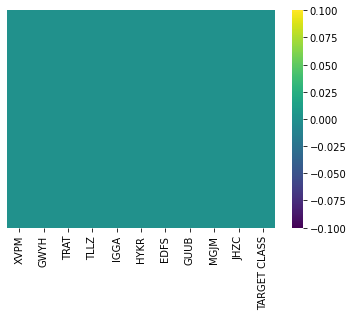

In [5]:
sns.heatmap(dataset.isnull(),yticklabels=False,cmap='viridis',cbar=True)

In [6]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [7]:
print(x)

[[1636.67061424  817.98852535 2565.99518893 ...  330.72789263
  1494.87863094  845.13608809]
 [1013.40275983  577.58733171 2644.14127258 ...  447.1576194
  1193.03252061  861.08180884]
 [1300.03550074  820.51869732 2025.85446882 ...  845.49149205
  1968.36751347 1647.18629068]
 ...
 [ 921.99482202  607.99690117 2065.48252892 ...  186.85457733
   978.34010697 1943.30491202]
 [1157.06934832  602.7491604  1548.80999538 ...  552.38810686
  1264.81807905 1331.87902044]
 [1287.15002538 1303.60008541 2247.28753539 ...  251.91694816
   846.16751144  952.89575107]]


In [8]:
print(y)

[0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1
 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1
 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1
 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1
 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0
 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0
 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0
 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1
 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1
 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0
 1 0 0 1 1 1 1 0 0 1 0 0 

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
print(x_train)

[[1417.35810617 1088.08575541  963.03166654 ...  953.30175582
   358.30612927 1995.77694291]
 [ 743.76340147 1556.57427518 1167.31110704 ...  734.46682317
  1317.97220765 2573.94614158]
 [1252.19138714  621.08793344 1533.66317809 ...  501.66225983
   667.82370116 1926.973363  ]
 ...
 [1547.83476043 1585.88797673  492.66705125 ...  731.97295252
  1159.42270483  960.67343749]
 [1174.89614281 1623.33682994 2472.02582989 ...  505.2167166
  1034.04715544 2061.39911699]
 [1325.88360126  510.29205419 1952.44970427 ...  623.19547882
   787.30217772  189.17222146]]


In [11]:
print(x_test)

[[1044.07821609  511.73050584 1471.60645656 ...  313.45359407
   732.38080333 1506.77788488]
 [ 537.05958868 1149.8859737  2008.44863867 ...  287.2142144
   435.40612359 1981.3019941 ]
 [1703.06544503  512.88588915  919.56690155 ...  893.77617318
  1330.06190504 1741.4608174 ]
 ...
 [ 823.55591169  877.6951638  1765.15828143 ...  609.41949525
  1497.96961222 1215.43859093]
 [1602.98302123  898.01157748 1584.48782198 ...  710.88476289
  1157.4436925  1924.22068015]
 [1572.49799499 1332.41558875 1474.73189744 ...  380.5062495
  1073.96073139 1350.42833026]]


In [12]:
print(y_train)

[0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1
 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1
 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0
 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1
 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1
 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1
 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0
 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0
 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0
 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1
 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1
 0 0 1 1 0 1 1 0 1 0 1 0 

In [13]:
print(y_test)

[1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1
 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1
 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1
 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0]


In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,:] = sc.fit_transform(x_train[:,:])
x_test[:,:] = sc.transform(x_test[:,:])

In [15]:
print(x_train)

[[ 1.00615417  0.24146227 -0.88214179 ...  1.59728406 -1.7988488
   0.97609705]
 [-0.82152687  1.42042422 -0.56717515 ...  0.70440725  0.56290665
   1.99520558]
 [ 0.55800326 -0.93374831 -0.00231811 ... -0.24546759 -1.0371205
   0.85482058]
 ...
 [ 1.36017968  1.49419282 -1.60736975 ...  0.69423191  0.17271348
  -0.84842563]
 [ 0.34827618  1.5884337   1.44448892 ... -0.23096491 -0.135838
   1.09176581]
 [ 0.75795415 -1.21256864  0.64338459 ...  0.25040476 -0.74308182
  -2.20831037]]


In [16]:
print(x_test)

[[-0.00667531 -1.20894875 -0.09799977 ... -1.01338499 -0.87824431
   0.11416405]
 [-1.38238139  0.39698392  0.7297261  ... -1.12044529 -1.60910433
   0.95058281]
 [ 1.7813709  -1.2060412  -0.94915759 ...  1.35441144  0.59265961
   0.52782735]
 ...
 [-0.60502389 -0.28799041  0.35461079 ...  0.19419684  1.00588349
  -0.39936445]
 [ 1.5098148  -0.2368637   0.07604547 ...  0.60818918  0.16784309
   0.84996857]
 [ 1.42709904  0.85632382 -0.09318084 ... -0.73980088 -0.03760997
  -0.16142512]]


In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=16)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [26]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[84 25]
 [14 77]]


0.805

In [23]:
error_rate =[]
for i in range(1,40):
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(x_train,y_train)
  y_pred_i = classifier.predict(x_test)
  error_rate.append(np.mean(y_pred_i != y_test))

Text(0, 0.5, 'Error Rate')

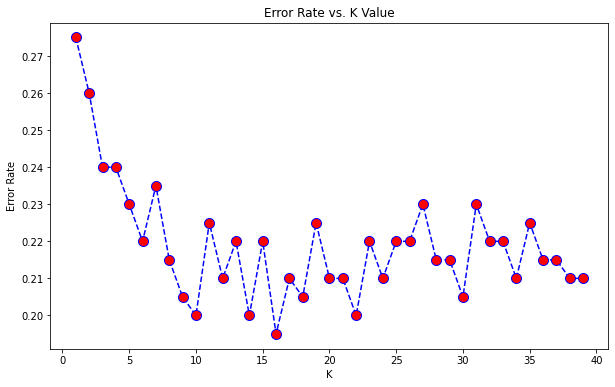

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')